In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, f1_score
from sklearn.metrics import mean_squared_error

In [2]:
df_clean=pd.read_csv(r"C:\Users\Dima\Downloads\Jupyter_projectes\Finshed_Machine learning\Machine_learing\Cleaned_df.csv",dtype={'col':np.float})
df_clean.rename(columns={'Unnamed: 0':'Country'},inplace=True)
df_clean.set_index('Country',inplace=True)
df_clean

,Alcohol,Alzheimers & Dementia,Anemia,Asthma,Birth Trauma,Bladder Cancer,Breast Cancer,Cervical Cancer,Colon-Rectum Cancers,Congenital Anomalies,...,Global South Countries,Medical Bankruptcies by Country,Richest Countries in the World,Social Mobility by Country,Countries by IQ - Average IQ by Country,Diabetes Rates by Country,Health Care Costs by Country,Lactose Intolerance by Country,Obesity Rates by Country,Zika Virus Countries
Country,,,,,,,,,,,,,,,,,,,,,
Belarus,119.03,0.00,0.72,0.40,1.70,676.27,2.21,17.05,2.85,282.35,...,No,9432800.0,6.131000e+10,9432800.0,101.60,0.06,9432800.0,9432800.0,0.245,No mosquitoes that spread Zika
Mongolia,194.38,0.00,6.03,2.96,1.04,1062.04,6.30,4.43,5.74,283.82,...,Yes,3378078.0,1.331000e+10,3378078.0,91.03,0.07,3378078.0,3378078.0,0.206,No mosquitoes that spread Zika
Russia,129.19,0.00,0.72,0.56,2.41,727.47,3.64,16.55,3.54,204.50,...,No,145805947.0,1.480000e+12,145805947.0,96.29,0.06,145805947.0,145805947.0,0.231,With mosquitoes but no reported Zika cases
Guatemala,82.54,0.00,2.78,4.47,0.52,732.92,7.09,4.10,5.53,85.26,...,Yes,18584039.0,7.760000e+10,18584039.0,47.72,0.13,18584039.0,18584039.0,0.212,Current or past transmission but no Zika outbreak
Slovenia,134.52,0.01,0.23,0.10,3.74,386.06,1.54,14.88,2.29,57.54,...,No,2078034.0,5.355000e+10,2078034.0,98.60,0.06,2078034.0,2078034.0,0.202,No mosquitoes that spread Zika
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jordan,103.93,0.00,2.17,1.77,4.28,505.49,1.02,10.85,6.89,98.90,...,Yes,10300869.0,4.376000e+10,10300869.0,80.70,0.15,10300869.0,10300869.0,0.355,No mosquitoes that spread Zika
Venezuela,94.22,0.46,1.13,3.10,1.35,623.36,7.07,7.41,9.91,99.32,...,Yes,29266991.0,4.726000e+10,29266991.0,82.99,0.10,29266991.0,29266991.0,0.256,Current or past transmission but no Zika outbreak
Singapore,90.81,0.00,0.45,0.07,1.40,317.40,0.99,13.72,1.92,60.68,...,Yes,5943546.0,3.452900e+11,5943546.0,105.89,0.12,5943546.0,5943546.0,0.061,Current or past transmission but no Zika outbreak


In [3]:
def outlier_detection_iqr(df):
    df_copy=df.copy()
    for col in df_copy:
        if df_copy[col].dtypes!=object:
            q1=np.percentile(df_copy[col],25)
            q3=np.percentile(df_copy[col],75)
            IQR=q3-q1
            df_copy.loc[(df_copy[col] <q1-1.5*IQR)| (df_copy[col]>q3+1.5*IQR), [col]]=np.nan
    return df_copy

values_iqr=outlier_detection_iqr(df_clean)
for i in values_iqr.columns:
    print(values_iqr[i].isna().sum(),  i)
## Number of outliners

1 Alcohol
18 Alzheimers & Dementia
5 Anemia
0 Asthma
4 Birth Trauma
1 Bladder Cancer
14 Breast Cancer
3 Cervical Cancer
2 Colon-Rectum Cancers
12 Congenital Anomalies
8 Coronary Heart Disease
13 Diabetes Mellitus
5 Diarrhoeal diseases
15 Drownings
11 Drug Use
5 Endocrine Disorders
2 Falls
10 Fires
24 Hepatitis C
4 HIV/AIDS
12 Hypertension
1 Inflammatory/Heart
0 Kidney Disease
15 Leukemia
2 Liver Cancer
1 Liver Disease
0 Low Birth Weight
9 Lung Cancers
37 Lung Disease
18 Malaria
17 Malnutrition
12 Multiple Sclerosis
7 Oesophagus Cancer
4 Oral Cancer
0 Ovary Cancer
1 Pancreas Cancer
6 Peptic Ulcer Disease
11 Poisonings
15 Prostate Cancer
1 Rheumatic Heart Disease
2 Road Traffic Accidents
13 Skin Cancers
3 Skin Disease
0 Stomach Cancer
7 Stroke
14 Suicide
10 Tuberculosis
13 Uterin Cancer
18 Labor Force 
22 Electricity Production 
27 Petroleum Consumption 
13 Total Fertility Rates 
0 Young Population 
29 Natural Gas Consumption 
2 Infant Mortality Rates 
31 Natural Gas Production 
2 Taxes 

In [4]:
def outlier_detection_zscore_dist(df):
    df_copy =df.copy()
    for col in df_copy:
        if (df_copy[col].dtypes!=object):
            z_score=(df_copy[col]-df_copy[col].mean())/df_copy[col].std()
            outliers=abs(z_score) >3
            df_copy.loc[outliers,[col]]=np.nan
    return df_copy
    


values_zscore=outlier_detection_zscore_dist(df_clean)
for i in values_zscore.columns:
    print(values_zscore[i].isna().sum(),  i)

1 Alcohol
3 Alzheimers & Dementia
3 Anemia
0 Asthma
3 Birth Trauma
1 Bladder Cancer
4 Breast Cancer
2 Cervical Cancer
0 Colon-Rectum Cancers
3 Congenital Anomalies
3 Coronary Heart Disease
3 Diabetes Mellitus
4 Diarrhoeal diseases
2 Drownings
4 Drug Use
4 Endocrine Disorders
2 Falls
4 Fires
5 Hepatitis C
1 HIV/AIDS
2 Hypertension
1 Inflammatory/Heart
0 Kidney Disease
2 Leukemia
2 Liver Cancer
1 Liver Disease
0 Low Birth Weight
5 Lung Cancers
1 Lung Disease
3 Malaria
2 Malnutrition
4 Multiple Sclerosis
5 Oesophagus Cancer
3 Oral Cancer
0 Ovary Cancer
1 Pancreas Cancer
3 Peptic Ulcer Disease
3 Poisonings
3 Prostate Cancer
0 Rheumatic Heart Disease
2 Road Traffic Accidents
4 Skin Cancers
3 Skin Disease
1 Stomach Cancer
2 Stroke
5 Suicide
1 Tuberculosis
4 Uterin Cancer
2 Labor Force 
2 Electricity Production 
2 Petroleum Consumption 
1 Total Fertility Rates 
0 Young Population 
2 Natural Gas Consumption 
2 Infant Mortality Rates 
2 Natural Gas Production 
1 Taxes 
4 Maternal Mortality Rate

In [5]:
for i in values_zscore.columns:
    if(values_zscore[i].dtypes!=object):
        values_zscore[i].fillna(values_zscore[i].median(), inplace=True)
values_zscore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163 entries, Belarus to Colombia
Data columns (total 90 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Alcohol                                  163 non-null    float64
 1   Alzheimers & Dementia                    163 non-null    float64
 2   Anemia                                   163 non-null    float64
 3   Asthma                                   163 non-null    float64
 4   Birth Trauma                             163 non-null    float64
 5   Bladder Cancer                           163 non-null    float64
 6   Breast Cancer                            163 non-null    float64
 7   Cervical Cancer                          163 non-null    float64
 8   Colon-Rectum Cancers                     163 non-null    float64
 9   Congenital Anomalies                     163 non-null    float64
 10  Coronary Heart Disease                   163

In [6]:
index_object=[]
for i in values_zscore.columns:
    if(values_zscore[i].dtypes==object):
        values_zscore[i]=pd.factorize(values_zscore[i])[0]
        index_object.append(i)

for i in index_object:
    print(values_zscore[i].value_counts())
    

1    110
0     53
Name: Global North Countries, dtype: int64
1    110
0     53
Name: Global South Countries, dtype: int64
0    70
2    51
1    42
Name: Zika Virus Countries, dtype: int64


In [7]:

for i in values_zscore.columns:
    if(i!='Life Expectancy'):
        score=values_zscore['Life Expectancy'].corr(values_zscore[i])
        print(score , i)
        if(score>=0.5 or score<=-0.5):
            pass  

0.12234022189552862 Alcohol
0.3432326160200385 Alzheimers & Dementia
-0.7073154873848596 Anemia
-0.9094838302681585 Asthma
0.35452097332390203 Birth Trauma
-0.8879632177742791 Bladder Cancer
-0.6925614703396481 Breast Cancer
0.5701227145428276 Cervical Cancer
-0.7678229824657409 Colon-Rectum Cancers
-0.3246235460891383 Congenital Anomalies
-0.426146704460449 Coronary Heart Disease
-0.7261116708625489 Diabetes Mellitus
-0.5678308682875051 Diarrhoeal diseases
-0.023663593743612633 Drownings
-0.2586556427511299 Drug Use
-0.4625068123590979 Endocrine Disorders
-0.778364137733732 Falls
0.02785733351790626 Fires
-0.5431810529358472 Hepatitis C
-0.5550318604668479 HIV/AIDS
-0.293579770917972 Hypertension
-0.8879632177742791 Inflammatory/Heart
0.4099590181073263 Kidney Disease
-0.26137376077569974 Leukemia
-0.7566806844405896 Liver Cancer
-0.8467457677153046 Liver Disease
0.6562332310949917 Low Birth Weight
-0.3852256827700742 Lung Cancers
-0.6602427894908616 Lung Disease
-0.6505930717146439 M

In [8]:
machin_value=[]
for i in values_zscore.columns:
    if(i!='Life Expectancy'):
        score=values_zscore['Life Expectancy'].corr(values_zscore[i])
        if(score>=0.5 or score<=-0.5):
            print("Taken To The machine Learinging :", i)
            machin_value.append(i)
machin_value.append('Life Expectancy')            

Taken To The machine Learinging : Anemia
Taken To The machine Learinging : Asthma
Taken To The machine Learinging : Bladder Cancer
Taken To The machine Learinging : Breast Cancer
Taken To The machine Learinging : Cervical Cancer
Taken To The machine Learinging : Colon-Rectum Cancers
Taken To The machine Learinging : Diabetes Mellitus
Taken To The machine Learinging : Diarrhoeal diseases
Taken To The machine Learinging : Falls
Taken To The machine Learinging : Hepatitis C
Taken To The machine Learinging : HIV/AIDS
Taken To The machine Learinging : Inflammatory/Heart
Taken To The machine Learinging : Liver Cancer
Taken To The machine Learinging : Liver Disease
Taken To The machine Learinging : Low Birth Weight
Taken To The machine Learinging : Lung Disease
Taken To The machine Learinging : Malaria
Taken To The machine Learinging : Oral Cancer
Taken To The machine Learinging : Ovary Cancer
Taken To The machine Learinging : Pancreas Cancer
Taken To The machine Learinging : Peptic Ulcer Dis

In [9]:
# With Normalize the data 
df_scale=values_zscore[machin_value]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_scale)
df_scaled=pd.DataFrame(x_scaled)
df_scaled
X_1=df_scaled.loc[:,0:36]
y_1=df_scaled.loc[:,37]
m_1=linear_model.LinearRegression()
m_1.fit(X_1,y_1)
print("Slope:",m_1.coef_)
print("Intercept:",m_1.intercept_)

## מקדמים של המשתנים 


Slope: [-0.02581237 -0.22073115 -0.05613361 -0.04331075 -0.0368837  -0.17902555
  0.08471506 -0.12748696 -0.02681789 -0.1134542   0.00123424 -0.05613361
  0.00978445 -0.04622265  0.01954804  0.03495968  0.04796916  0.03207692
 -0.09330534 -0.05613361 -0.0760418  -0.02995143 -0.15469838 -0.10466928
 -0.0380486  -0.48061928  0.0908019  -0.18670213  0.01645797 -0.04789899
  0.00121958  0.23008326  0.03406259  0.45001315  0.00893369  0.00893369
  0.04307033]
Intercept: 0.8642166852111859


In [10]:
# With Normalize the data 
print("R2:",r2_score(y_1,m_1.predict(X_1.values)))

R2: 0.9542062255185588


In [11]:
## With Normalize Data
m_1.score(X_1,y_1)

0.9542062255185588

In [12]:
## With Normalize Data
predicted_1=m_1.predict(X_1.values)
predicted_1

array([0.70419979, 0.50694295, 0.63563769, 0.64228583, 0.89335841,
       0.75471804, 0.63175984, 0.83654856, 0.70579045, 0.84903647,
       0.67752268, 0.62611032, 0.89269458, 0.56604299, 0.74857867,
       0.69931192, 0.87630125, 0.28877448, 0.59154803, 0.71052892,
       0.1104956 , 0.65572613, 0.58704187, 0.65299201, 0.91622792,
       0.54318998, 0.86301351, 0.83533796, 0.89541942, 0.87527397,
       0.68848366, 0.91427673, 0.65368579, 0.83153761, 0.72635857,
       0.81069938, 0.82329332, 0.86929727, 0.95226981, 0.55918691,
       0.2137564 , 0.90884919, 0.9086878 , 0.43812011, 0.79331776,
       0.76150598, 0.91045361, 0.32987605, 0.57084842, 0.07009371,
       0.81381556, 0.8958918 , 0.73465534, 0.90123559, 0.40008488,
       0.4504607 , 0.40470828, 0.39172031, 0.19865674, 0.37961025,
       0.55468073, 0.4782408 , 0.56097102, 0.90255571, 0.73976088,
       0.28590527, 0.32111381, 0.29959045, 0.15106711, 0.39075981,
       0.1945081 , 0.92152323, 0.33981118, 0.44187407, 0.73503

In [13]:
predicted_1=m_1.predict(X_1.values)
df_new1=pd.DataFrame({'Predict_values':predicted_1},y_1)
df_new1

,Predict_values
37,
0.671753,0.704200
0.514360,0.506943
0.597921,0.635638
0.664090,0.642286
0.892917,0.893358
...,...
0.665623,0.694823
0.579796,0.563072
0.967482,0.973787


In [14]:
## With no Normalize Data
X_2=values_zscore[machin_value].drop('Life Expectancy',axis=1)
y_2=values_zscore['Life Expectancy']
m_2=linear_model.LinearRegression()
m_2.fit(X_2,y_2)
print("Slope:",m_2.coef_)
print("Intercept:",m_2.intercept_)


Slope: [-2.51210283e-02 -4.04458165e-01 -1.26273698e-03 -4.86682412e-02
 -4.99335797e-02 -4.65621561e-01  2.49327117e-02 -4.06630574e-01
 -1.22513287e-01 -2.56050408e-02  5.66864521e-04 -1.26273698e-03
  4.36295441e-03 -8.21876044e-02  1.35406123e-02  1.93737063e-02
  5.71781706e-02  4.45514430e-02 -2.52749681e-01 -1.26273698e-03
 -5.03823079e-01 -8.01928751e-02 -7.51556673e-02 -1.56000780e-02
 -1.53658612e-02 -2.99902432e+00  7.15309279e-02 -8.41519392e-02
  5.97302833e-04 -6.59468020e-02  8.37628598e-04  2.04311212e-01
  2.00461652e-02  3.82301010e-01  2.68135767e-01  2.68135767e-01
  2.03608896e-02]
Intercept: 78.83959247988705


In [15]:
## With no Normalize Data
print("R2:",r2_score(y_2,m_2.predict(X_2.values)))

R2: 0.9542062255185588


In [16]:
## With no Normalize Data
m_2.score(X_2,y_2)


0.9542062255185588

In [17]:
## With no Normalize Data
predicted_2=m_2.predict(X_2.values)
df_new2=pd.DataFrame({'Predict_values':predicted_2},y_2)
df_new2

,Predict_values
Life Expectancy,
75.058,76.031853
70.334,70.111386
72.842,73.974030
74.828,74.173567
81.696,81.709259
...,...
74.874,75.750403
72.298,71.796030
83.934,84.123240


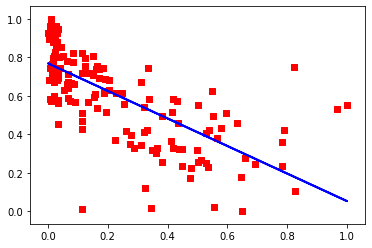

In [18]:
#With normalize Data
m_1.fit(X_1.iloc[:,0:1],y_1)
plt.scatter(x=X_1.iloc[:,0:1],y=y_1,c='r',marker='s')
plt.plot(X_1.iloc[:,0:1],m_1.predict(X_1.iloc[:,0:1]),'k',color='blue',linewidth=2)


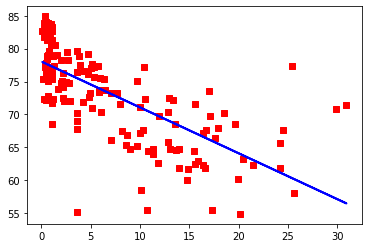

In [19]:
#With no normalize
m_2.fit(X_2.iloc[:,0:1],y_2)
plt.scatter(x=X_2.iloc[:,0:1],y=y_2,c='r',marker='s')
plt.plot(X_2.iloc[:,0:1],m_2.predict(X_2.iloc[:,0:1]),'k',color='blue',linewidth=2)

In [20]:
#Mean השונות של  NORMALIZED DATA
m_1.fit(X_1,y_1)
y_predct_1=m_1.predict(X_1)
mean_error=mean_squared_error(y_1.tolist(),y_predct_1)
print(mean_error)

0.00259082039716006


In [21]:
#Mean השונות של  NOT NORMALIZED DATA
m_2.fit(X_2,y_2)
y_predct_2=m_2.predict(X_2)
mean_error=mean_squared_error(y_2.tolist(),y_predct_2)
print(mean_error)

2.3339151543784653


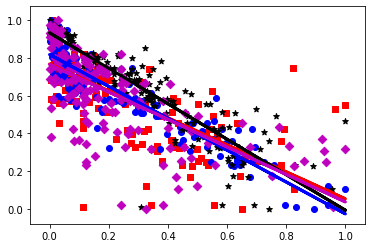

In [22]:
##NORMALIZED DATA Graph of vectors
#4 linear rows that in data
m_1_1=linear_model.LinearRegression()
m_1_2=linear_model.LinearRegression()
m_1_3=linear_model.LinearRegression()
m_1_4=linear_model.LinearRegression()
m_1_1.fit(X_1.iloc[:,0:1],y_1)
m_1_2.fit(X_1.iloc[:,1:2],y_1)
m_1_3.fit(X_1.iloc[:,2:3],y_1)
m_1_4.fit(X_1.iloc[:,3:4],y_1)
plt.scatter(x=X_1.iloc[:,0:1],y=y_1,c='r',marker='s')
plt.scatter(x=X_1.iloc[:,1:2],y=y_1,c='b',marker='o')
plt.scatter(x=X_1.iloc[:,2:3],y=y_1,c='k',marker='*')
plt.scatter(x=X_1.iloc[:,3:4],y=y_1,c='m',marker='D')
plt.plot(X_1.iloc[:,0:1],m_1_1.predict(X_1.iloc[:,0:1].values.reshape(X_1.iloc[:,0:1].shape[0],1)),c='r',linewidth=3)
plt.plot(X_1.iloc[:,1:2],m_1_2.predict(X_1.iloc[:,1:2].values.reshape(X_1.iloc[:,1:2].shape[0],1)),c='b',linewidth=3)
plt.plot(X_1.iloc[:,2:3],m_1_3.predict(X_1.iloc[:,2:3].values.reshape(X_1.iloc[:,2:3].shape[0],1)),c='k',linewidth=3)
plt.plot(X_1.iloc[:,3:4],m_1_4.predict(X_1.iloc[:,3:4].values.reshape(X_1.iloc[:,3:4].shape[0],1)),c='m',linewidth=3)



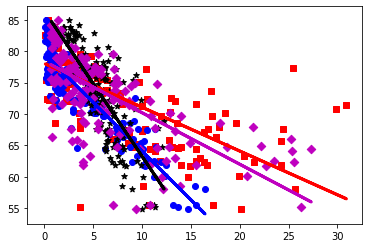

In [23]:
#Not Normalized Vectors 
m_2_1=linear_model.LinearRegression()
m_2_2=linear_model.LinearRegression()
m_2_3=linear_model.LinearRegression()
m_2_4=linear_model.LinearRegression()
m_2_1.fit(X_2.iloc[:,0:1],y_2)
m_2_2.fit(X_2.iloc[:,1:2],y_2)
m_2_3.fit(X_2.iloc[:,5:6],y_2)
m_2_4.fit(X_2.iloc[:,3:4],y_2)
plt.scatter(x=X_2.iloc[:,0:1],y=y_2,c='r',marker='s')
plt.scatter(x=X_2.iloc[:,1:2],y=y_2,c='b',marker='o')
plt.scatter(x=X_2.iloc[:,5:6],y=y_2,c='k',marker='*')
plt.scatter(x=X_2.iloc[:,3:4],y=y_2,c='m',marker='D')
plt.plot(X_2.iloc[:,0:1],m_2_1.predict(X_2.iloc[:,0:1].values.reshape(X_2.iloc[:,0:1].shape[0],1)),c='r',linewidth=3)
plt.plot(X_2.iloc[:,1:2],m_2_2.predict(X_2.iloc[:,1:2].values.reshape(X_2.iloc[:,1:2].shape[0],1)),c='b',linewidth=3)
plt.plot(X_2.iloc[:,5:6],m_2_3.predict(X_2.iloc[:,5:6].values.reshape(X_2.iloc[:,5:6].shape[0],1)),c='k',linewidth=3)
plt.plot(X_2.iloc[:,3:4],m_2_4.predict(X_2.iloc[:,3:4].values.reshape(X_2.iloc[:,3:4].shape[0],1)),c='m',linewidth=3)
